# Visualize and Plot results

In [500]:
import numpy as np
from qcircha.utils import gather_data, list_data
from qcircha.circuit_selector import pick_circuit

import matplotlib.pyplot as plt
import matplotlib
#matplotlib.rcParams['text.usetex'] = True
cmap = plt.get_cmap('tab10')
from matplotlib.lines import Line2D

import seaborn as sns
sns.set_theme()

import pprint
pp = pprint.PrettyPrinter(indent=4)

import json
from tqdm import tqdm

data_path = "./data/ent_scaling/"
list_data(path=data_path)


['2022-02-28_16-50-16_898',
 '2022-02-28_17-40-06_28',
 '2022-02-28_17-05-58_812',
 '2022-02-25_18-43-03_427',
 '2022-02-25_18-05-23_651',
 '2022-02-28_16-44-58_330',
 '2022-02-28_16-42-55_464',
 '2022-02-26_18-45-40_923',
 '2022-02-28_17-50-17_956',
 '2022-02-26_18-43-39_545',
 '2022-02-25_18-22-50_651',
 '2022-02-28_17-45-16_517',
 '2022-02-26_18-47-34_697',
 '2022-02-26_19-30-20_890',
 '2022-02-28_14-29-13_329',
 '2022-02-28_17-02-58_278',
 '2022-02-26_19-25-46_58',
 '2022-02-26_19-23-34_315',
 '2022-02-28_14-22-37_117',
 '2022-02-28_14-34-11_580',
 '2022-02-28_17-17-12_138']

#### Entanglement scaling

In [465]:
data_runs = gather_data(key=['alternate', 'fmap', 'var_entanglement'],
                        value = [True, 'ZZFeatureMap', 'full'], path=data_path)
idx_run = 1
run = data_runs[idx_run]
print(f"{len(data_runs)} runs available. Selecting run: {run}")

ent_data = np.load(data_path + run + ".npy", allow_pickle=True)
with open(data_path + run + '.json') as file:
    ent_metadata = json.load(file)
pp.pprint(ent_metadata)

2 runs available. Selecting run: 2022-02-28_17-17-12_138
{   'alternate': True,
    'backend': 'Aer',
    'fmap': 'ZZFeatureMap',
    'fmap_entanglement': 'full',
    'max_num_qubits': 12,
    'var_ansatz': 'TwoLocal',
    'var_entanglement': 'full'}


A single element in the `ent_data` list, be it `data = ent_data[0]`, contains the results for a specific number of qubits, with varying repetitions. It is organized as follows:
1. `data[0]`: contains total entanglement (1d-array of dimension num_reps)
2. `data[1]`: standard deviation of total entanglement (check if calculated correctly, but not important as results are consistent)
3. `data[3]`: expected total entanglement if Haar.

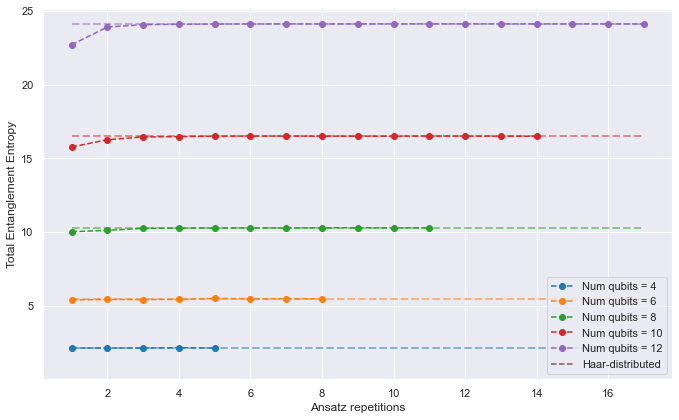

In [466]:
fig = plt.figure(figsize=(9.6, 6))

title = f"{ent_metadata['fmap']}_{ent_metadata['var_ansatz']}"
plt.ylabel("Total Entanglement Entropy")
plt.xlabel("Ansatz repetitions")

plt.ylim(0, max(ent_data[-1, 0])+1)
plt.yticks(range(5, int(max(ent_data[-1, 0])+5), 5))

n_qubits = np.arange(4, ent_metadata['max_num_qubits']+1, 2, dtype=int)
for idx, data in enumerate(ent_data):
    plt.hlines(data[2], 1, len(ent_data[-1, 0]),
               ls="--", color=cmap(idx), lw=2, alpha=0.5)
    plt.plot(range(1, len(data[0])+1), data[0], ls="--", marker="o",
             c=cmap(idx), label=f"Num qubits = {n_qubits[idx]}")

plt.plot([], [], ls='--', color=cmap(idx+1), label="Haar-distributed")

plt.legend(loc = 4)
plt.tight_layout()
#plt.savefig("data/Imgs/" + run + ".pdf", format="pdf")


#### Entanglement map comparison: linear vs. circular vs. a2a

In [513]:
ent_datas = dict()
for ent_map in ['linear', 'circular', 'full']:
    data_runs = gather_data(key=['alternate', 'fmap', 'var_ansatz', 'var_entanglement'],
                            value=[True, 'TwoLocal_parametricRz', 'TwoLocal', ent_map], path=data_path)
    
    idx_run = 1
    run = data_runs[idx_run]
    print(f"{len(data_runs)} runs available. Selecting run: {run}")

    ent_datas[ent_map] = np.load(data_path + run + ".npy", allow_pickle=True)
    with open(data_path + run + '.json') as file:
        ent_metadata = json.load(file)
    pp.pprint(ent_metadata)

2 runs available. Selecting run: 2022-02-28_17-02-58_278
{   'alternate': True,
    'backend': 'Aer',
    'fmap': 'ZZFeatureMap',
    'fmap_entanglement': 'linear',
    'max_num_qubits': 12,
    'var_ansatz': 'TwoLocal',
    'var_entanglement': 'linear'}
2 runs available. Selecting run: 2022-02-25_18-05-23_651
{   'alternate': True,
    'backend': 'Aer',
    'fmap': 'ZZFeatureMap',
    'fmap_entanglement': 'circular',
    'max_num_qubits': 12,
    'var_ansatz': 'TwoLocal',
    'var_entanglement': 'circular'}
2 runs available. Selecting run: 2022-02-28_17-17-12_138
{   'alternate': True,
    'backend': 'Aer',
    'fmap': 'ZZFeatureMap',
    'fmap_entanglement': 'full',
    'max_num_qubits': 12,
    'var_ansatz': 'TwoLocal',
    'var_entanglement': 'full'}


##### Plot style 1

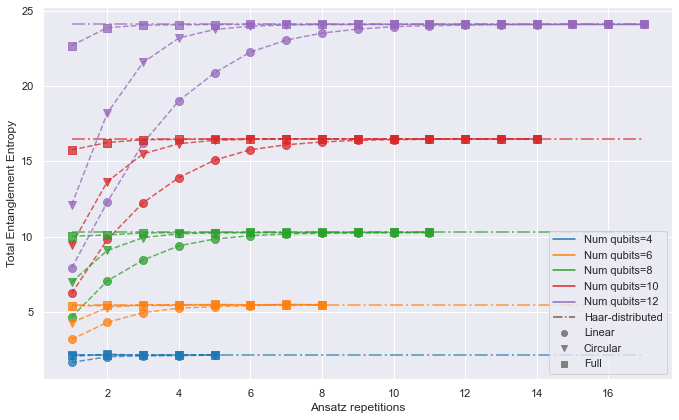

In [514]:
fig = plt.figure(figsize=(9.6, 6))

title = f"{ent_metadata['fmap']}_{ent_metadata['var_ansatz']}"
plt.ylabel("Total Entanglement Entropy")
plt.xlabel("Ansatz repetitions")

#plt.ylim(0, max(ent_data[-1, 0])+1)
#plt.yticks(range(5, int(max(ent_data[-1, 0])+5), 5))

n_qubits = np.arange(4, ent_metadata['max_num_qubits']+1, 2, dtype=int)
markers = ['o', 'v', 's']

# PLOT ENTANGLEMENT DATA
for jdx, _ent in enumerate(ent_datas.values()):
    for idx, data in enumerate(_ent):
        plt.hlines(data[2], 1, len(ent_data[-1, 0]), ls="-.", color=cmap(idx), lw=2, alpha=0.25)
        plt.plot(range(1, len(data[0])+1), data[0], ls="--", marker=markers[jdx], c=cmap(idx), markersize = 8, alpha = 0.75)
        #plt.text(y=data[2]-1., x=12, s=fr"$ \# qubits = {n_qubits[idx]}$")

# LINE LEGEND
for i in range(5):
    plt.plot([], [],  c=cmap(i), label=f"Num qubits={n_qubits[i]}")
plt.plot([], [], ls='-.', color=cmap(idx+1), label="Haar-distributed")

# MARKERS LEGEND
plt.plot([], [], ls=" ", marker=markers[0], c='gray', label="Linear")
plt.plot([], [], ls=" ", marker=markers[1], c='gray', label="Circular")
plt.plot([], [], ls=" ", marker=markers[2], c='gray', label="Full")

plt.legend(loc=4)
plt.tight_layout()
#plt.savefig("data/Imgs/" + run + ".pdf", format="pdf")


##### Plot style 2

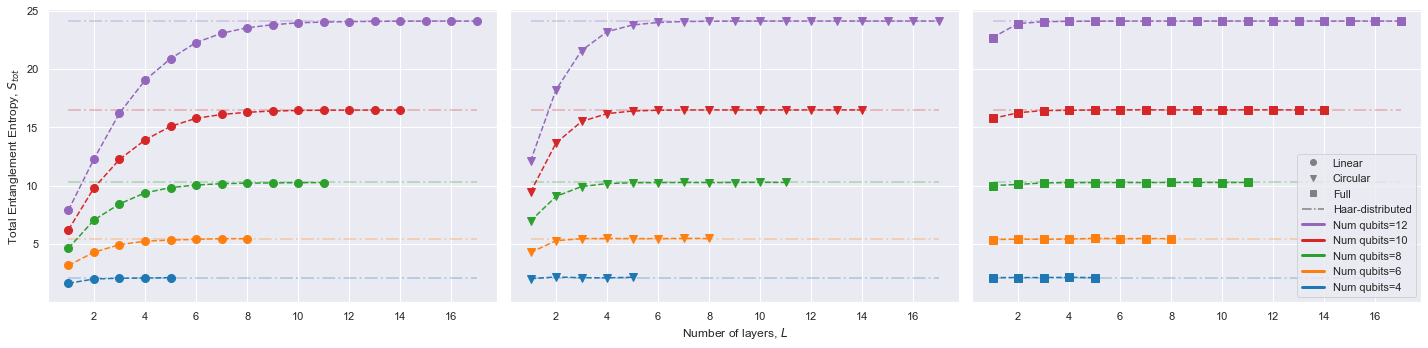

In [515]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5), sharey=True, sharex=True)

title = f"{ent_metadata['fmap']}_{ent_metadata['var_ansatz']}"
#plt.ylabel("Total Entanglement Entropy")
#plt.xlabel("Ansatz repetitions")

plt.ylim(0, max(ent_data[-1, 0])+1)
plt.yticks(range(5, int(max(ent_data[-1, 0])+5), 5))

n_qubits = np.arange(4, ent_metadata['max_num_qubits']+1, 2, dtype=int)
markers = ['o', 'v', 's']

# PLOT ENTANGLEMENT DATA
for jdx, (ax, _ent) in enumerate(zip(axs, ent_datas.values())): # run through entanglement topology
    for idx, data in enumerate(_ent): # run trough number of qubits
        # Haar limit
        ax.hlines(data[2], 1, len(_ent[-1, 0]), ls="-.", color=cmap(idx), lw=2, alpha=0.25)
        # Simulation results
        ax.errorbar(range(1, len(data[0])+1), data[0],ls="--", marker=markers[jdx], c=cmap(idx), markersize=8, alpha=1)


# MARKERS LEGEND
axs[2].plot([], [], ls=" ", marker=markers[0], c='gray', label="Linear")
axs[2].plot([], [], ls=" ", marker=markers[1], c='gray', label="Circular")
axs[2].plot([], [], ls=" ", marker=markers[2], c='gray', label="Full")

# LINE LEGEND
axs[2].plot([], [], ls='-.', color='grey', label="Haar-distributed")
for i in list(range(5))[::-1]:
    axs[2].plot([], [], lw = 3, c=cmap(i), label=f"Num qubits={n_qubits[i]}")

# SET LABEL NAMES
axs[0].set_ylabel("Total Entanglement Entropy, $S_{tot}$")
axs[1].set_xlabel("Number of layers, $L$")

# PLOT LEGEND
axs[2].legend(loc=4)

plt.tight_layout()
plt.savefig("data/Imgs/" + 'ZZfmap_TwoLocal' + ".pdf", format="pdf")


##### Plot style 3

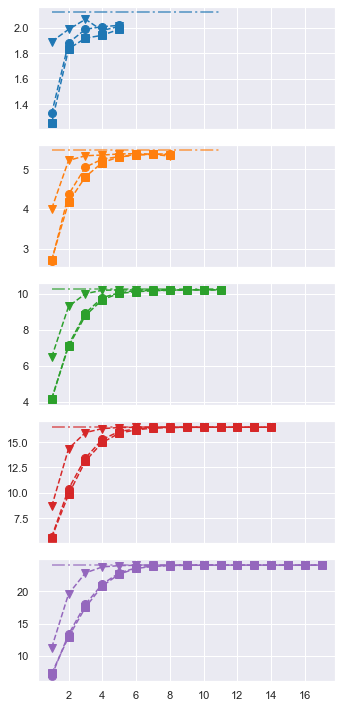

In [446]:
fig, axs = plt.subplots(5, 1, figsize=(5, 10), sharex=True)

title = f"{ent_metadata['fmap']}_{ent_metadata['var_ansatz']}"
#plt.ylabel("Total Entanglement Entropy")
#plt.xlabel("Ansatz repetitions")

#plt.ylim(0, max(ent_data[-1, 0])+1)
plt.yticks(range(5, int(max(ent_data[-1, 0])+5), 5))

n_qubits = np.arange(4, ent_metadata['max_num_qubits']+1, 2, dtype=int)
markers = ['o', 'v', 's']

# PLOT ENTANGLEMENT DATA
for jdx, _ent in enumerate(ent_datas.values()):
    for idx, (ax, data) in enumerate(zip(axs, _ent)):
        ax.hlines(data[2], 1, len(ent_data[-1, 0]),
                  ls="-.", color=cmap(idx), lw=2, alpha=0.25)
        ax.plot(range(1, len(data[0])+1), data[0], ls="--", marker=markers[jdx],
                c=cmap(idx), markersize=8, alpha=1)
        #plt.text(y=data[2]-1., x=12, s=fr"$ \# qubits = {n_qubits[idx]}$")

# LINE LEGEND
for i in range(5):
    plt.plot([], [],  c=cmap(i), label=f"Num qubits={n_qubits[i]}")
plt.plot([], [], ls='-.', color=cmap(idx+1), label="Haar-distributed")

# MARKERS LEGEND
plt.plot([], [], ls=" ", marker=markers[0], c='gray', label="Linear")
plt.plot([], [], ls=" ", marker=markers[1], c='gray', label="Circular")
plt.plot([], [], ls=" ", marker=markers[2], c='gray', label="Full")

#axs[0].set_ylabel("Total Entanglement Entropy")

#plt.legend(loc=4)
plt.tight_layout()
#plt.savefig("data/Imgs/" + run + ".pdf", format="pdf")


### Optimal repetition study 

In [459]:
res

[[3, 5, 8, 9, 11], [1, 3, 4, 5, 7], [1, 2, 2, 3, 3]]

1.0 -0.7999999999999998
0.7000000000000001 -1.6000000000000005
0.25 0.20000000000000018


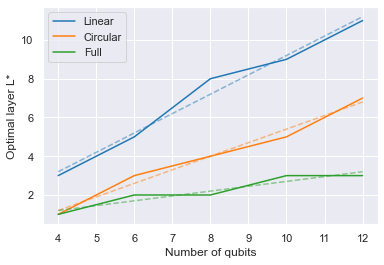

In [458]:
import scipy as sp

res = [[],[],[]]
for i, _ent in enumerate(ent_datas.values()): # run through entanglement topologies
    for j, x in enumerate(_ent): # run trough number of qubits
        mask = np.abs((x[0] - x[2])) < 1e-1
        optimal_rep = mask.nonzero()[0][0] + 1
        res[i].append(optimal_rep)

slopes = []
intercepts = []
for y in res:
    s, i, r, p, se = sp.stats.linregress(n_qubits, y=y)
    slopes.append(s)
    intercepts.append(i)
    print(s, i)

entanglement_maps = ['Linear', 'Circular', 'Full']
for i in range(3):
    plt.plot(n_qubits, n_qubits * slopes[i] + intercepts[i], ls = "--", c = cmap(i), alpha = 0.5)
    plt.plot(n_qubits, res[i], c = cmap(i), label = entanglement_maps[i])

plt.legend()
plt.xlabel("Number of qubits")
plt.ylabel("Optimal layer L*")
plt.show()


In [392]:
import scipy as sp

slope, intercept, r, p, se = sp.stats.linregress(n_qubits, y=res[2])
print(slope, intercept)

0.25 0.20000000000000018


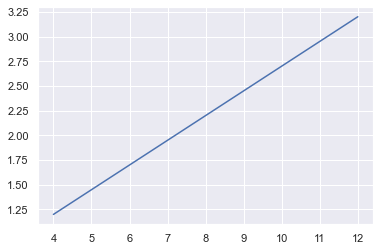

In [393]:
plt.plot(n_qubits, n_qubits*slope + intercept)

Found! 4 1
Found! 6 3
Found! 8 4
Found! 10 5
Found! 12 4


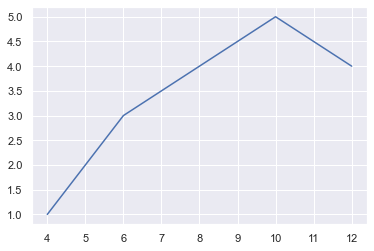

In [243]:
res = []
for idx, ent_array in enumerate(ent_data[:, 0]):
    for jdx, ent in enumerate(ent_array):
        if np.abs(ent - ent_data[idx, 2]) / ent_data[0, 2] < 1e-2:
            print("Found!", n_qubits[idx], jdx + 1)
            res.append(jdx + 1)
            break

plt.plot(n_qubits, res)


In [7]:
(max(res) - min(res)) / (12 - 4)

1.125

In [ ]:
0.5 # a2a
0.625 #ring


In [116]:
np.abs(np.array(data[0]) - data[2])

array([1.20125841e+01, 5.89665268e+00, 2.52827126e+00, 9.08860149e-01,
       3.35098414e-01, 1.21590761e-01, 4.04578068e-02, 1.57915845e-02,
       5.21923991e-03, 1.80692286e-04, 1.50162159e-03, 3.32269058e-04,
       1.71003153e-03, 1.19141698e-03, 5.90258879e-04, 1.18143616e-03,
       1.63666900e-03])

### Optimal repetition

In [4]:
idx_run = "10_linear"
reps_data = np.load(data_path+"optimal_reps/" + idx_run + ".npz")

x = reps_data['x']
y = reps_data['y']
q = reps_data['q'] # intercept
m = reps_data['m'] # slope

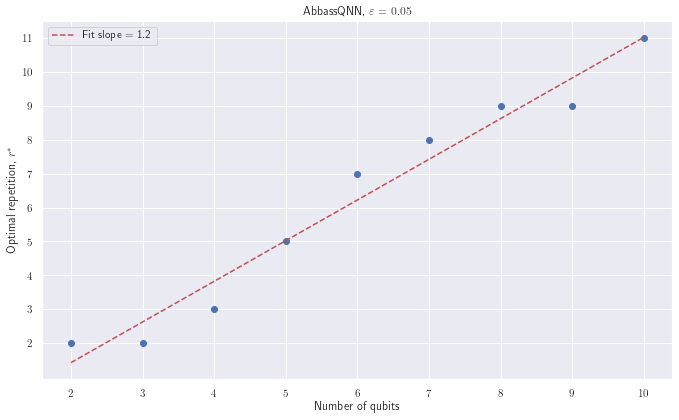

In [18]:
fig = plt.figure(figsize=(9.6, 6))

plt.title(fr"AbbassQNN, $\varepsilon={0.05}$")
plt.xlabel("Number of qubits")
plt.ylabel(fr"Optimal repetition, $r^*$")

plt.xticks(range(min(x), max(x)+1))
plt.yticks(range(min(y), max(y)+1))

plt.scatter(x, y, marker='o')
plt.plot(x, q + m * x, 'r', ls='--',
         label=f'Fit slope = {np.round(m,3)}')

plt.legend()
plt.tight_layout()

#### [Random] Circuits plot 

66


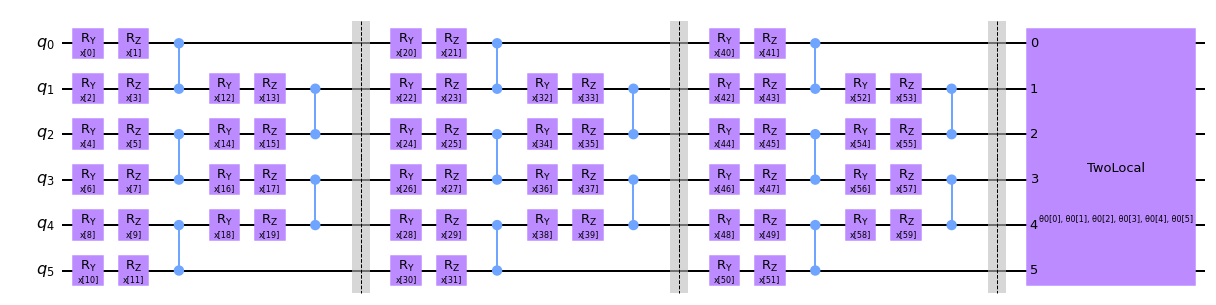

In [2]:
from circuits import *
import matplotlib.pyplot as plt

num_qubits = 6
alternate = True
num_reps = 1

# Select circuit
# ansatz = Abbas_QNN(num_qubits, reps=num_reps, alternate=alternate, barrier=True)  # AbbassQNN
#feature_map = ring_circ(num_qubits, num_reps = 1, barrier=False) # Ring circ
feature_map = piramidal_circuit(num_qubits=num_qubits, num_reps=3, piramidal=False, barrier=True)
#feature_map = ZZFeatureMap(num_qubits, reps=1, entanglement='linear')
#feature_map = TwoLocal(num_qubits, 'rx', 'cx', 'linear', reps=1, insert_barriers=False, skip_final_rotation_layer=True)
var_ansatz = TwoLocal(num_qubits, 'ry', 'cx', 'linear', reps=1, insert_barriers=False, skip_final_rotation_layer=True)

ansatz = general_qnn(num_reps, feature_map=feature_map,
                     var_ansatz=var_ansatz, alternate=alternate, barrier=False)

print(len(ansatz.parameters))
ansatz.draw()

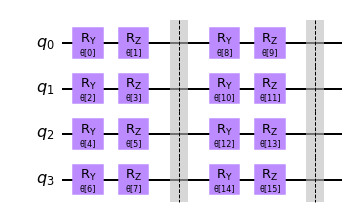

In [3]:
dummy_circ(4, 2, barrier = True).draw()

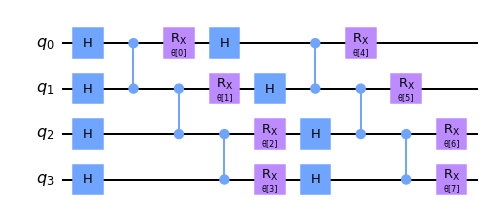

In [7]:
circ9(4, 2).draw()

In [358]:
import numpy as np
import matplotlib.pyplot as plt
from run_simulations import approx_haar_entanglement, haar_entanglement

exact = []
approx = []
qubs = list(range(2, 10+1))
for idx, num_qubits in enumerate(qubs):
    print(idx, end="\r")
    exact.append(np.sum([haar_entanglement(num_qubits, j) for j in range(1, num_qubits)]))
    approx.append(np.sum([approx_haar_entanglement(num_qubits, j) for j in range(1, num_qubits)]))

approx = np.array(approx)
exact = np.array(exact)

print((approx-exact)/approx)

plt.plot(qubs, exact)  # (approx-exact)/approx
plt.plot(qubs, approx)


ModuleNotFoundError: No module named 'run_simulations'

In [18]:
num_qubits = 10
print(np.sum([approx_haar_entanglement(num_qubits, j) for j in range(1, num_qubits)]))
print(np.sum([haar_entanglement(num_qubits, j)for j in range(1, num_qubits)]))

16.541570138998637
16.501177492742794


In [455]:
from qiskit import Aer
import qiskit as qk
from qiskit.circuit.library import TwoLocal

bknd = Aer.get_backend('unitary_simulator')


fmap1 = TwoLocal(4, 'rx', 'cx', 'linear', reps=1,skip_final_rotation_layer=True)
fmap2 = TwoLocal(4, 'rx', 'cx', 'circular', reps=1,skip_final_rotation_layer=True)
fmap3 = TwoLocal(4, 'rx', 'cx', 'full', reps=1, skip_final_rotation_layer=True)
vans = 'TwoLocal'

nr = 2
qc1 = pick_circuit(4, num_reps=nr, feature_map='identity', var_ansatz=vans)
qc2 = pick_circuit(4, num_reps=nr, feature_map='identity', var_ansatz=vans+'_ring')
qc3 = pick_circuit(4, num_reps=nr, feature_map='identity', var_ansatz=vans+'_full')

#qc1 = pick_circuit(4, num_reps=4, feature_map='identity', var_ansatz=vans)
#qc2 = pick_circuit(4, num_reps=4, feature_map='identity', var_ansatz=vans+'_ring')
#qc3 = pick_circuit(4, num_reps=4, feature_map='identity', var_ansatz=vans+'_full')

params = np.pi * np.random.rand(len(qc1.parameters))

qc3.decompose().draw()

eL = np.array(bknd.run(qc1.bind_parameters(0*params).decompose()).result().get_unitary()).real
eR = np.array(bknd.run(qc2.bind_parameters(0*params).decompose()).result().get_unitary()).real
eF = np.array(bknd.run(qc3.bind_parameters(0*params).decompose()).result().get_unitary()).real

uL = np.array(bknd.run(qc1.bind_parameters(1*params).decompose()).result().get_unitary()).real
uR = np.array(bknd.run(qc2.bind_parameters(1*params).decompose()).result().get_unitary()).real
uF = np.array(bknd.run(qc3.bind_parameters(1*params).decompose()).result().get_unitary()).real


In [310]:
qc = qk.QuantumCircuit(4)
for i in range(4):
    qc.ry(1*np.random.rand(1), i)
    qc.rz(1*np.random.rand(1), i)
np.array(bknd.run(qc).result().get_unitary())

array([[ 3.78797181e-01-7.70982608e-01j, -8.14464222e-02+1.65771495e-01j,
        -1.82104056e-01+3.70644416e-01j,  3.91547893e-02-7.96934695e-02j,
        -8.53699655e-02+1.73757256e-01j,  1.83556758e-02-3.73601166e-02j,
         4.10410049e-02-8.35325673e-02j, -8.82436085e-03+1.79606108e-02j,
        -1.35962080e-02+2.76729618e-02j,  2.92336521e-03-5.95005414e-03j,
         6.53628048e-03-1.33035799e-02j, -1.40538707e-03+2.86044629e-03j,
         3.06419337e-03-6.23668791e-03j, -6.58842250e-04+1.34097069e-03j,
        -1.47308921e-03+2.99824344e-03j,  3.16733735e-04-6.44662139e-04j],
       [ 8.67811588e-02-1.63042138e-01j,  4.03608377e-01-7.58288708e-01j,
        -4.17194260e-02+7.83813505e-02j, -1.94031862e-01+3.64541913e-01j,
        -1.95579717e-02+3.67449982e-02j, -9.09616940e-02+1.70896417e-01j,
         9.40235604e-03-1.76648970e-02j,  4.37291887e-02-8.21572392e-02j,
        -3.11484548e-03+5.85208903e-03j, -1.44867590e-02+2.72173383e-02j,
         1.49743985e-03-2.81335026e-0

In [211]:
u_list = []
for qc in [qc1, qc2, qc3]:
    _ = np.array(bknd.run(qc.bind_parameters(
        params).decompose()).result().get_unitary())
    u_list.append(_)


def dist(u, v):
    a = u - v
    b = np.transpose(np.conjugate(a))
    r = np.trace(a @ b)
    return np.sqrt(r.real)


print("Linear-Ring: ", dist(u_list[0], u_list[1]))
print("Linear-Full: ", dist(u_list[0], u_list[2]))
print("Ring-Full:   ", dist(u_list[1], u_list[2]))

Linear-Ring:  5.3722757466198745
Linear-Full:  5.926074249058121
Ring-Full:    5.524370790391266


In [329]:
fmap1 = TwoLocal(4, 'rx', 'cx', 'linear', reps=1,
                 skip_final_rotation_layer=True)
fmap2 = TwoLocal(4, 'rx', 'cx', 'circular', reps=1,
                 skip_final_rotation_layer=True)
fmap3 = TwoLocal(4, 'rx', 'cx', 'full', reps=1, skip_final_rotation_layer=True)
vans = 'TwoLocal'

nr = 2
qc1 = pick_circuit(4, num_reps=nr, feature_map='identity', var_ansatz=vans)
qc2 = pick_circuit(4, num_reps=nr, feature_map='identity', var_ansatz=vans+'_ring')
qc3 = pick_circuit(4, num_reps=nr, feature_map='identity', var_ansatz=vans+'_full')

ss = []
for k in tqdm(np.linspace(0., 1., 11)):
    rr = []
    for i in range(200):
        params = k * 1 * np.pi * (np.random.rand(len(qc1.parameters)) - 0.0)

        u_list = []
        for qc in [qc1, qc2, qc3]:
            _ = np.array(bknd.run(qc.bind_parameters(params).decompose()).result().get_unitary())
            u_list.append(_)

        rr.append([dist(u_list[0], u_list[1]), dist(u_list[0], u_list[2]), dist(u_list[1], u_list[2])])

    rr = np.array(rr)
    ss.append([np.mean(rr, axis=0), np.std(rr, axis=0)])

print(ss)


100%|██████████| 11/11 [00:27<00:00,  2.46s/it]

[[array([4.89897949, 0.        , 4.89897949]), array([1.687539e-14, 0.000000e+00, 1.687539e-14])], [array([4.89897949, 0.96705049, 4.92850798]), array([1.70905700e-14, 2.50442776e-01, 1.44325361e-02])], [array([4.89897949, 2.01016397, 5.02192641]), array([1.71040658e-14, 4.18019263e-01, 4.72638840e-02])], [array([4.89897949, 2.70829419, 5.11575004]), array([1.71892931e-14, 6.05744325e-01, 8.81164159e-02])], [array([4.89897949, 3.58491909, 5.2527328 ]), array([1.71621951e-14, 6.47421725e-01, 1.10854402e-01])], [array([4.89897949, 4.13129933, 5.350176  ]), array([1.63226800e-14, 7.02858900e-01, 1.27292733e-01])], [array([4.89897949, 4.62139457, 5.42501732]), array([1.63144620e-14, 7.77980717e-01, 1.36296323e-01])], [array([4.89897949, 4.91328766, 5.46258588]), array([1.62935357e-14, 7.37581103e-01, 1.41654627e-01])], [array([4.89897949, 5.19613939, 5.4807615 ]), array([1.71904403e-14, 5.42606844e-01, 1.23311833e-01])], [array([4.89897949, 5.364645  , 5.51218426]), array([1.62297443e-14, 

In [498]:
from qcircha.entanglement import entanglement_bond
bknd = Aer.get_backend('statevector_simulator')

fmap1 = TwoLocal(8, ['h','rx'], 'cx', 'linear', reps=1,skip_final_rotation_layer=True)
fmap2 = TwoLocal(8, 'rx', 'cx', 'circular', reps=1,skip_final_rotation_layer=True)
fmap3 = TwoLocal(8, 'rx', 'cx', 'full', reps=1, skip_final_rotation_layer=True)
vans = 'TwoLocal'
fmap = 'ZZFeatureMap'

nr = 4
qc1 = pick_circuit(8, num_reps=nr, feature_map=fmap1, var_ansatz=vans)
qc2 = pick_circuit(8, num_reps=nr, feature_map=fmap+'_ring', var_ansatz=vans+'_ring')
qc3 = pick_circuit(8, num_reps=nr, feature_map=fmap+'_full', var_ansatz=vans+'_full')

exp = []
for i in range(200):
    params = 1 * np.pi * (np.random.rand(len(qc1.parameters)) - 0.0)
    u_list = []
    for qc in [qc1, qc2, qc3]:
        _ = np.array(bknd.run(qc.bind_parameters(params).decompose()).result().get_statevector())
        u_list.append(_)
    exp.append(u_list)

exp = np.array(exp)

m1 = np.mean(np.array([entanglement_bond(e) for e in exp[:, 0]]), axis=0)
m2 = np.mean(np.array([entanglement_bond(e) for e in exp[:, 1]]), axis=0)
m3 = np.mean(np.array([entanglement_bond(e) for e in exp[:, 2]]), axis=0)

print(m1, m2, m3)

[0.60649767 1.15772235 1.64112523 1.97898853 1.9063588  1.34507128
 0.68594482] [0.686116   1.34915929 1.9350873  2.24228236 1.93869224 1.35402301
 0.68647915] [0.68696501 1.35066376 1.94625595 2.26490762 1.95012949 1.3546525
 0.68602062]


In [495]:
print(np.sum(m1), np.sum(m2), np.sum(m3))
ent_datas['full'][2][0]

9.37186367686861 10.192029701235413 10.259773967688043


array([10.016124  , 10.10851308, 10.24122539, 10.26255922, 10.26583263,
       10.2728659 , 10.26904708, 10.28067877, 10.28366728, 10.27241206,
       10.27973057])

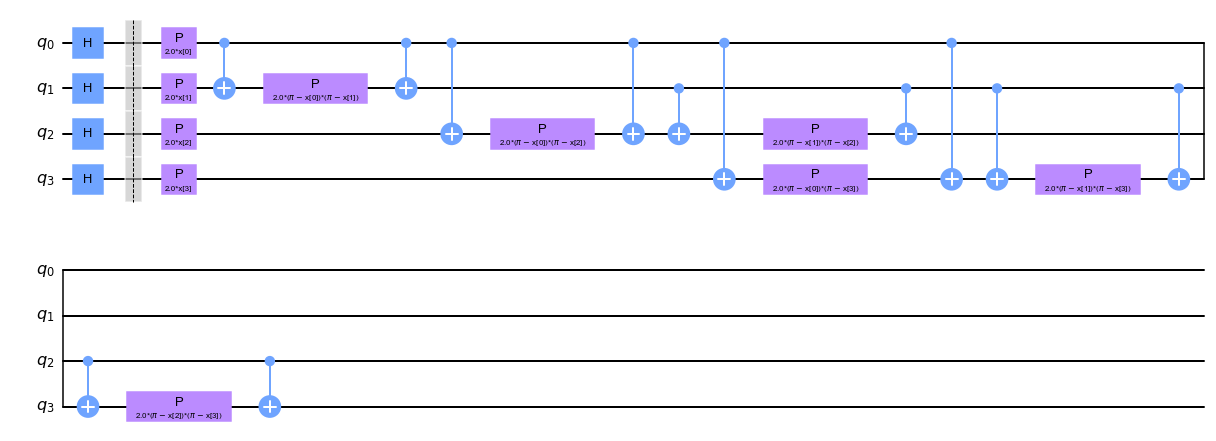

In [635]:
from qiskit.circuit.library import ZZFeatureMap, TwoLocal

qc = TwoLocal(4, 'ry', 'crz', 'full', reps=1, skip_final_rotation_layer=True, name='TwoLocal_parametricRz')
qc = ZZFeatureMap(4, reps = 1, entanglement = 'full', insert_barriers=True)
qc.decompose().draw()

In [624]:
sim_bknd = Aer.get_backend('statevector_simulator')

qc = qk.transpile(qc, backend=sim_bknd)
sim_bknd.run(qc.assign_parameters(p)).result().get_statevector()


Statevector([8.12971549e-01+1.10514242e-17j,
             9.95022549e-03-1.08002773e-02j,
             1.47769503e-01-1.18027083e-02j,
             2.56380263e-03-7.72785732e-04j,
             2.77620341e-01-1.14377868e-01j,
             3.80555240e-03-3.86453467e-03j,
             5.04050321e-02-2.13757565e-02j,
             9.71167480e-04-1.86868134e-04j,
             4.36403785e-01+8.23721321e-18j,
             7.70816213e-03-1.65098270e-03j,
             7.95711992e-02+8.18660804e-04j,
             1.31680187e-03+5.76355906e-04j,
             1.49026824e-01+6.13981323e-02j,
             2.39657024e-03+1.65319955e-03j,
             2.61964339e-02+1.33235802e-02j,
             1.43623800e-04+5.11089692e-04j],
            dims=(2, 2, 2, 2))


In [625]:
sim_bknd = Aer.get_backend('statevector_simulator')

qc = qc.decompose().decompose()#qk.transpile(qc, backend=sim_bknd)
sim_bknd.run(qc.assign_parameters(p)).result().get_statevector()


Statevector([8.12971549e-01+0.00000000e+00j,
             9.95022549e-03-1.08002773e-02j,
             1.47769503e-01-1.18027083e-02j,
             2.56380263e-03-7.72785732e-04j,
             2.77620341e-01-1.14377868e-01j,
             3.80555240e-03-3.86453467e-03j,
             5.04050321e-02-2.13757565e-02j,
             9.71167480e-04-1.86868134e-04j,
             4.36403785e-01-1.42274907e-17j,
             7.70816213e-03-1.65098270e-03j,
             7.95711992e-02+8.18660804e-04j,
             1.31680187e-03+5.76355906e-04j,
             1.49026824e-01+6.13981323e-02j,
             2.39657024e-03+1.65319955e-03j,
             2.61964339e-02+1.33235802e-02j,
             1.43623800e-04+5.11089692e-04j],
            dims=(2, 2, 2, 2))


In [623]:
p = np.random.rand(len(qc.parameters))
